In [63]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("Phishing_Legitimate_full.csv")

In [50]:
df = df.drop("id",axis=1)

<AxesSubplot:>

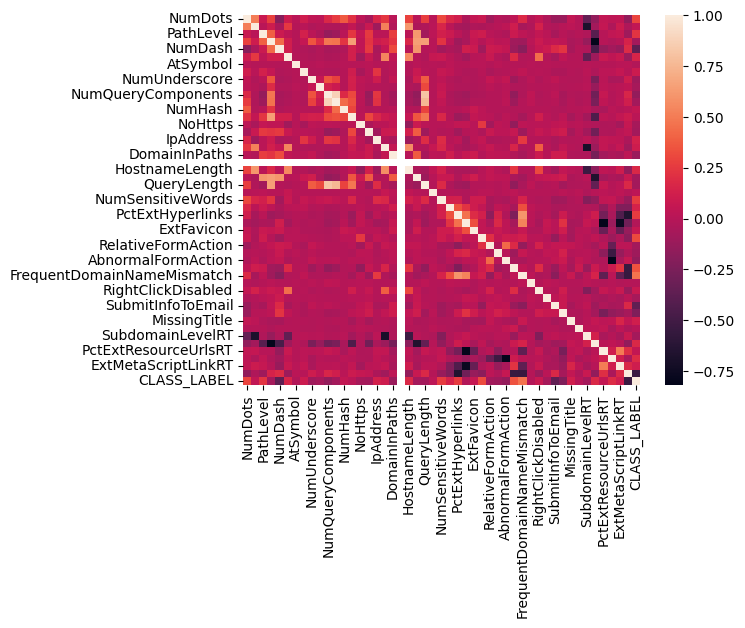

In [51]:
sns.heatmap(data = df.corr())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [53]:
newdf = df.iloc[:,:19]

In [54]:
newdf["CLASS_LABEL"] = df["CLASS_LABEL"]

<AxesSubplot:>

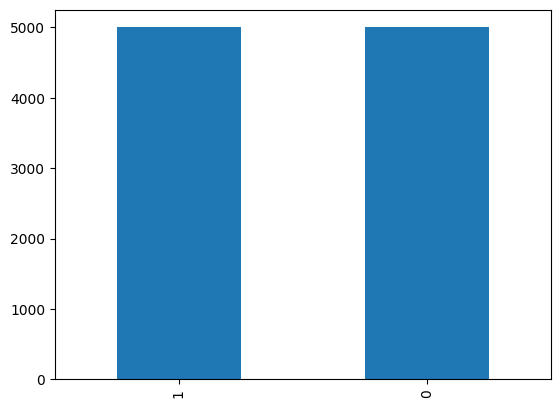

In [107]:
newdf["CLASS_LABEL"].value_counts().plot(kind="bar")

In [61]:
X = newdf.iloc[:,:19]
Y = newdf["CLASS_LABEL"]

In [76]:
len(X[0])

19

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33)


6700
3300


In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [69]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [90]:
def Neural(n:int ,model:Sequential):
    

    model.add(Dense(units=19, activation='sigmoid', input_dim=19))


    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=13, activation='relu'))
    model.add(Dense(units=15, activation='relu'))
    model.add(Dense(units=13, activation='relu'))
    model.add(Dense(units=10, activation='relu'))



    model.add(Dense(units=1, activation='sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer='adam')
    model.fit(x_train,y_train,epochs=n,batch_size=32)

In [100]:
import winsound

n=2000
model = Sequential()
Neural(n,model)
acc = model.evaluate(x_test,y_test)
winsound.Beep(1000,2000)
call = 1
print(f"Accuracy is {acc*100} after {call} calls")
model.save("my2ndModel.h5")

Epoch 1/2000
210/210 [==============================] - 2s 2ms/step - loss: 0.6473
Epoch 2/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.4136
Epoch 3/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3736
Epoch 4/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3538
Epoch 5/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 6/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 7/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3316
Epoch 8/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 9/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 10/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3194
Epoch 11/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 12/2000
210/210 [==============================] - 0s 2ms/step - loss: 0.3108
E

In [102]:
y_pred = model.predict(x_test)

104/104 [==============================] - 0s 2ms/step


In [104]:
y_pred=y_pred.flatten()

In [105]:
count = 0
for x,y in zip(y_pred,y_test):
    x = int(round(x,2))
    if x==y:
        count +=1
acc = (count/len(y_test))*100
print(acc)

63.81818181818182
